#Daily Challenge: Web Scraping and Data Visualization

Using the selenium to fetch the page source

In [ ]:
import os
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Confirming  Current Working Directory
print(f"Current Working Directory: {os.getcwd()}") 

# Step 2: Configuring the Selenium WebDriver
service = Service(r"C:\Users\vaise\Downloads\chromedriver-win64\chromedriver-win64\chromedriver.exe")  # Update with your path
driver = webdriver.Chrome(service=service)

# Step 3: Opening the BBC Weather page
url = 'https://www.bbc.com/weather/293397'
driver.get(url)

# Allowing  the page to load
driver.implicitly_wait(10)

# Fetching  the page source
page_source = driver.page_source
driver.quit()



Current Working Directory: c:\Users\vaise\Documents\di\week 7\Day_2\Daily


Scrapping wr-day-temperature__high-value ,wr-value--temperature--c , wr-day__weather-type-description and combining into the list of dictionaries to create weather_df

In [20]:

soup = BeautifulSoup(page_source, 'html.parser')
weather_data = []
days = soup.select('.wr-day__title')  # Days of the week
temperatures = soup.select('.wr-day-temperature__high-value .wr-value--temperature--c')  # High temperatures
descriptions = soup.select('.wr-day__weather-type-description')  # Weather descriptions

for day, temp, desc in zip(days, temperatures, descriptions):
    weather_data.append({
        'Day': day.text.strip(),
        'Temperature (F)': int(temp.text.strip().replace('°', '')),
        'Description': desc.text.strip()
    })

weather_df = pd.DataFrame(weather_data)


print("Weather DataFrame:")
print(weather_df.head())  

csv_filename = 'weather_data.csv'
weather_df.to_csv(csv_filename, index=False)
print(f"Data saved to {csv_filename} in the current working directory.")



Weather DataFrame:
                               Day  Temperature (F)  \
0                          Tonight               20   
1     Sunday 22nd DecemberSun 22nd               20   
2     Monday 23rd DecemberMon 23rd               19   
3    Tuesday 24th DecemberTue 24th               20   
4  Wednesday 25th DecemberWed 25th               19   

                             Description  
0        A clear sky and a gentle breeze  
1              Sunny and a gentle breeze  
2   Thundery showers and a gentle breeze  
3  Sunny intervals and a moderate breeze  
4              Sunny and a gentle breeze  
Data saved to weather_data.csv in the current working directory.


Displaying of the first rows of the dataframe

In [21]:
df = pd.read_csv('weather_data.csv')

print("Loaded Weather Data:")
print(df.head())

Loaded Weather Data:
                               Day  Temperature (F)  \
0                          Tonight               20   
1     Sunday 22nd DecemberSun 22nd               20   
2     Monday 23rd DecemberMon 23rd               19   
3    Tuesday 24th DecemberTue 24th               20   
4  Wednesday 25th DecemberWed 25th               19   

                             Description  
0        A clear sky and a gentle breeze  
1              Sunny and a gentle breeze  
2   Thundery showers and a gentle breeze  
3  Sunny intervals and a moderate breeze  
4              Sunny and a gentle breeze  


Checking for missing values and getting the first info

In [22]:
print("DataFrame Info:")
print(df.info())
print("Missing Values:")
print(df.isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Day              13 non-null     object
 1   Temperature (F)  13 non-null     int64 
 2   Description      13 non-null     object
dtypes: int64(1), object(2)
memory usage: 444.0+ bytes
None
Missing Values:
Day                0
Temperature (F)    0
Description        0
dtype: int64


Calculating  basic statistics for numeric columns 

In [23]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
       Temperature (F)
count        13.000000
mean         18.384615
std           1.120897
min          17.000000
25%          18.000000
50%          18.000000
75%          19.000000
max          20.000000


Calculating the average temperature for the week

In [25]:
avg_temp = df['Temperature (F)'].mean()
print(f"Average Temperature: {avg_temp:.2f}F")


Average Temperature: 18.38F


Bar Plot of Temperatures Over the Week

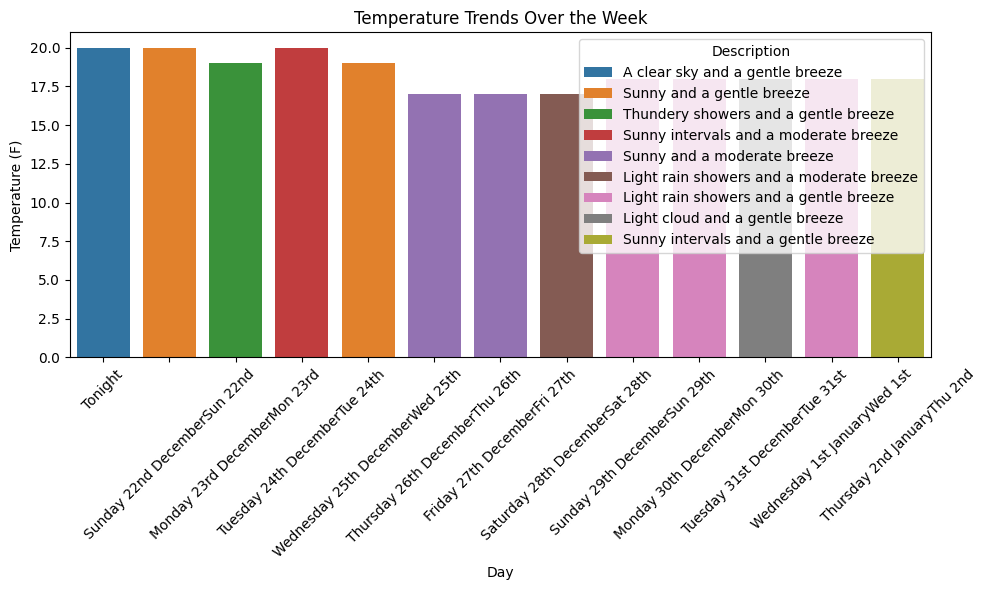

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Day', y='Temperature (F)', hue='Description', dodge=False)
plt.title('Temperature Trends Over the Week')
plt.xlabel('Day')
plt.ylabel('Temperature (F)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Histogram of Temperature Distribution: Visualize the frequency of temperature ranges.


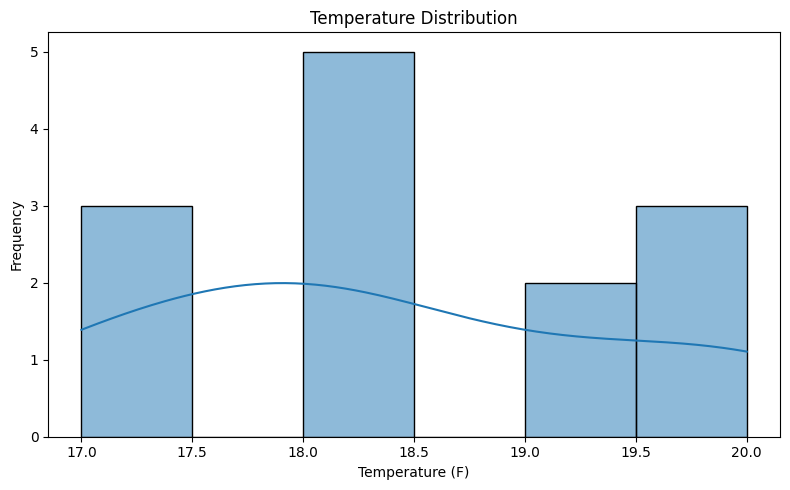

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Temperature (F)', kde=True, bins=6)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


3. Heatmap: Data Density

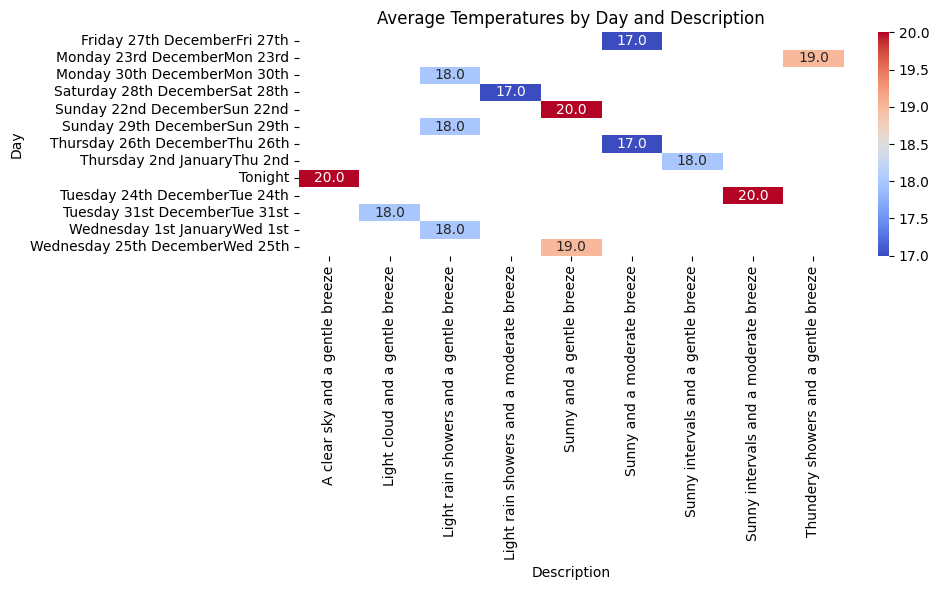

In [30]:
dummy_pivot = df.pivot_table(index='Day', columns='Description', values='Temperature (F)', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(dummy_pivot, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Average Temperatures by Day and Description')
plt.tight_layout()
plt.show()